In [ ]:
#TRABAJO PRÁCTICO N° 3

In [ ]:
#Parte I: Creación de variables, histogramas, kernels y resumen de la base de datos final

In [ ]:
#Limpiamos la base

In [1]:
import pandas as pd

In [7]:
# Cargar base 2004 (formato Stata)
df_2004 = pd.read_stata(r'C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP3\Usus indivudual dta\Individual_t104.dta')
# Cargar base 2024 (formato Excel)
df_2024 = pd.read_excel('C:\\Users\\Gustavo\\Documents\\GitHub\\BigDataUBA-Grupo26\\TP3\\EPH_usu_1er_Trim_2024_xlsx\\usu_individual_T124.xlsx')

In [9]:
df_2004['ANO4'] = 2004
df_2024['ANO4'] = 2024

In [15]:
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

In [17]:
def homogeneizar_sexo(valor):
    if valor in [1, '1', 'Hombre', 'VARÓN', 'V', 'MASCULINO']:
        return 'Hombre'
    elif valor in [2, '2', 'Mujer', 'MUJER', 'F', 'FEMENINO']:
        return 'Mujer'
    return pd.NA

df_2004['CH04'] = df_2004['CH04'].apply(homogeneizar_sexo)
df_2024['CH04'] = df_2024['CH04'].apply(homogeneizar_sexo)

In [19]:
# Intersección de columnas
columnas_comunes = df_2004.columns.intersection(df_2024.columns)
df_2004 = df_2004[columnas_comunes]
df_2024 = df_2024[columnas_comunes]

In [25]:
# Eliminar columnas duplicadas de df_2004
df_2004 = df_2004.loc[:, ~df_2004.columns.duplicated()]

# Dejar solo las columnas comunes en ambos DataFrames
columnas_comunes = df_2004.columns.intersection(df_2024.columns)
df_2004 = df_2004[columnas_comunes]
df_2024 = df_2024[columnas_comunes]

# Concatenar los DataFrames
df_final = pd.concat([df_2004, df_2024], ignore_index=True)

In [38]:
# Filtrar por Mar del Plata, cuyo aglomerado es 34
df_mdp = df_final[df_final['AGLOMERADO'] == 34]

In [40]:
df_mdp.head()

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR
45520,TQRMNOQPPHLOLSCDEIKAH00855762,1.0,1,1,2024.0,1,43,S,34,885.0,...,2.0,NaN,1,208000.0,6,6.0,6,6.0,NaN,6
45521,TQRMNOQWVHMKLRCDEIKAH00808003,1.0,1,1,2024.0,1,43,S,34,1441.0,...,12.0,NaN,12,0.0,12,12.0,12,12.0,NaN,12
45522,TQRMNOQWVHMKLRCDEIKAH00808003,1.0,2,1,2024.0,1,43,S,34,1441.0,...,12.0,NaN,12,0.0,12,12.0,12,12.0,NaN,12
45523,TQRMNOQWVHMKLRCDEIKAH00808003,1.0,3,1,2024.0,1,43,S,34,1441.0,...,12.0,NaN,12,0.0,12,12.0,12,12.0,NaN,12
45524,TQRMNOQWVHMKLRCDEIKAH00808003,1.0,4,1,2024.0,1,43,S,34,1441.0,...,12.0,NaN,12,0.0,12,12.0,12,12.0,NaN,12


In [ ]:
#1)	Cree la variable “edad2” definida como edad2 (edad al cuadrado). 

In [46]:
# Crear la variable edad2 (edad al cuadrado)
# Para evitar ambos warnings, usamos .loc y creamos la columna de forma más eficiente
df_mdp.loc[:, 'edad2'] = df_mdp['CH06'] ** 2

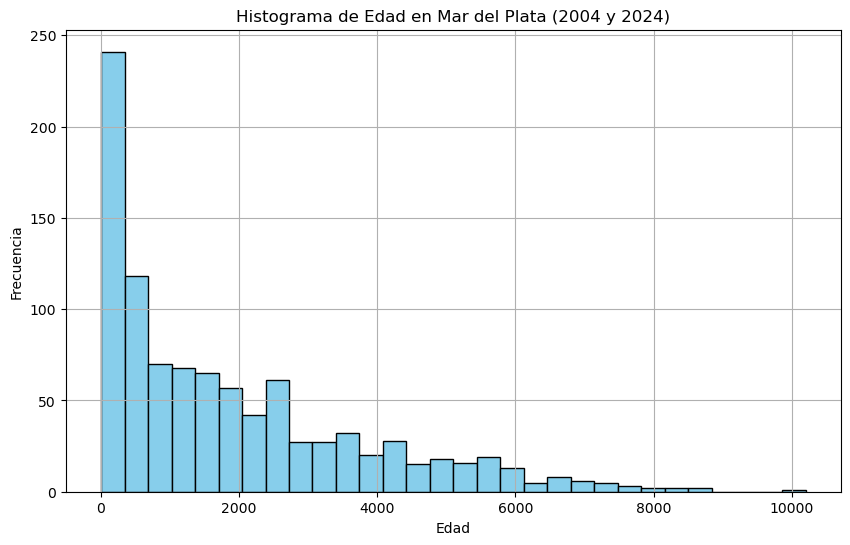

In [50]:
import matplotlib.pyplot as plt

# Histograma de la variable edad
plt.figure(figsize=(10, 6))
plt.hist(df_mdp['edad2'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Edad en Mar del Plata (2004 y 2024)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

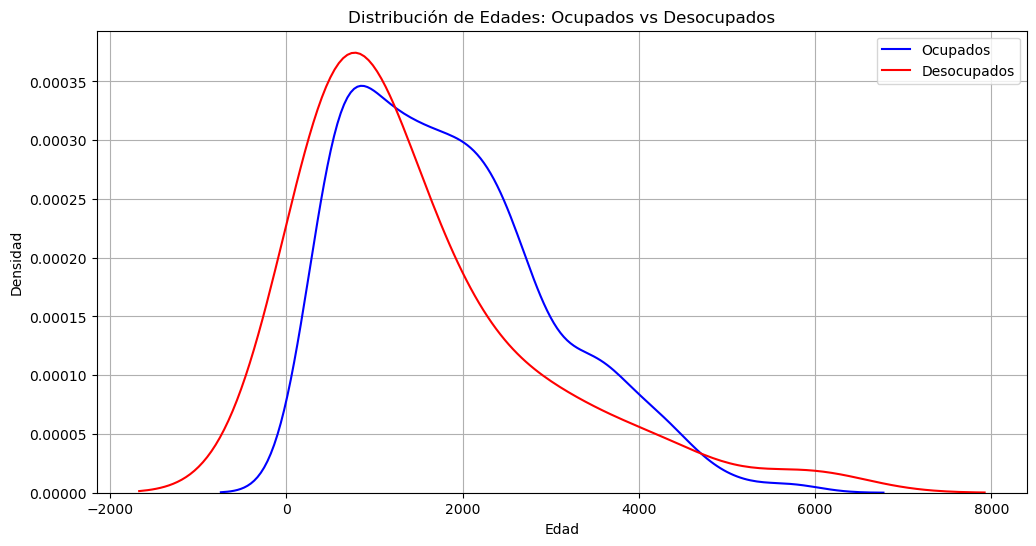

In [54]:
import seaborn as sns

# Suponiendo que 'ESTADO' representa ocupado (1) o desocupado (2)
ocupados = df_mdp[df_mdp['ESTADO'] == 1]['edad2']
desocupados = df_mdp[df_mdp['ESTADO'] == 2]['edad2']

# Graficar distribución de kernels
plt.figure(figsize=(12, 6))

sns.kdeplot(ocupados, label='Ocupados', color='blue')
sns.kdeplot(desocupados, label='Desocupados', color='red')

plt.title('Distribución de Edades: Ocupados vs Desocupados')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#2)	Cree la variable educ definida como la cantidad de años de educación. 

In [62]:
def calcular_educacion(row):
    if row['CH12'] == 1:  # Primario
        return 6  # 6 años de educación
    elif row['CH12'] == 2:  # Secundario
        if row['CH13'] == 1:  # Si finalizó el secundario
            return 12  # 12 años de educación
        else:
            return 11  # Si no lo finalizó, 11 años
    elif row['CH12'] == 3:  # Terciario o Universitario
        return 16  # 16 años de educación (aproximadamente)

# Estadísticas descriptivas de la variable 'educ'
df_mdp['educ'].describe()
df_mdp = df_mdp.copy()  # Crear una copia del DataFrame
df_mdp['educ'] = df_mdp.apply(calcular_educacion, axis=1)
df_mdp.loc[:, 'educ'] = df_mdp.apply(calcular_educacion, axis=1)

In [ ]:
#3)	Cree la variable salario_semanal como el total de ingresos habituales (P21) dividido 40. 

In [68]:
# Definir el factor de ajuste de inflación
ajuste_inflacion = 6.25

# Ajustar salario semanal para el año 2004
df_mdp['salario_semanal'] = (df_mdp['P21'] / 40) * ajuste_inflacion

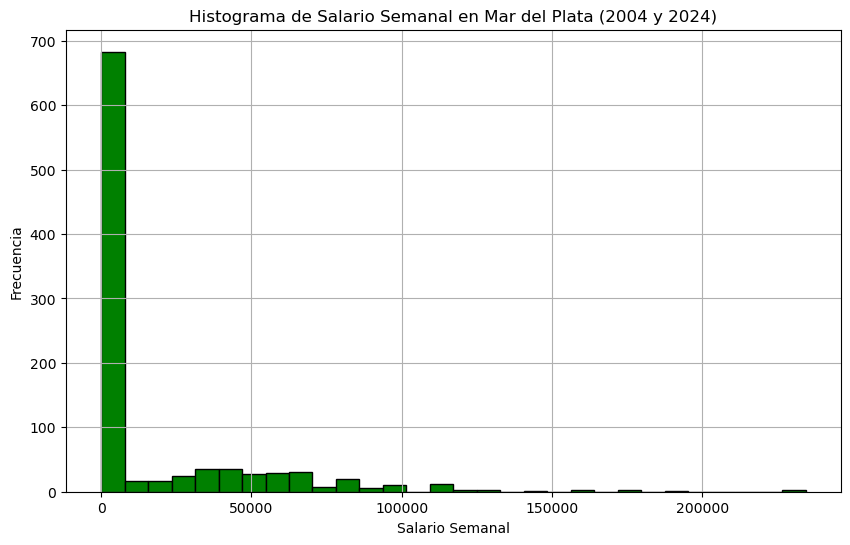

In [70]:
# Ajustar ingresos de 2004 a pesos de 2024 (supón que 'ajuste_inflacion' es el factor de ajuste)
df_mdp['salario_semanal'] = (df_mdp['P21'] / 40) * ajuste_inflacion

# Histograma de salario_semanal
plt.figure(figsize=(10, 6))
plt.hist(df_mdp['salario_semanal'], bins=30, color='green', edgecolor='black')
plt.title('Histograma de Salario Semanal en Mar del Plata (2004 y 2024)')
plt.xlabel('Salario Semanal')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [78]:
desocupados_salario = df_mdp[(df_mdp['ESTADO'] == 'Desocupado') & (df_mdp['salario_semanal'] > 0)]['salario_semanal']

In [83]:
salario_promedio_ocupados = df_mdp[df_mdp['ESTADO'] == 'Ocupado']['salario_semanal'].mean()
df_mdp['salario_semanal'] = df_mdp['salario_semanal'].replace(0, salario_promedio_ocupados)

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_5488\964675940.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Ahora sí encontrará la etiqueta


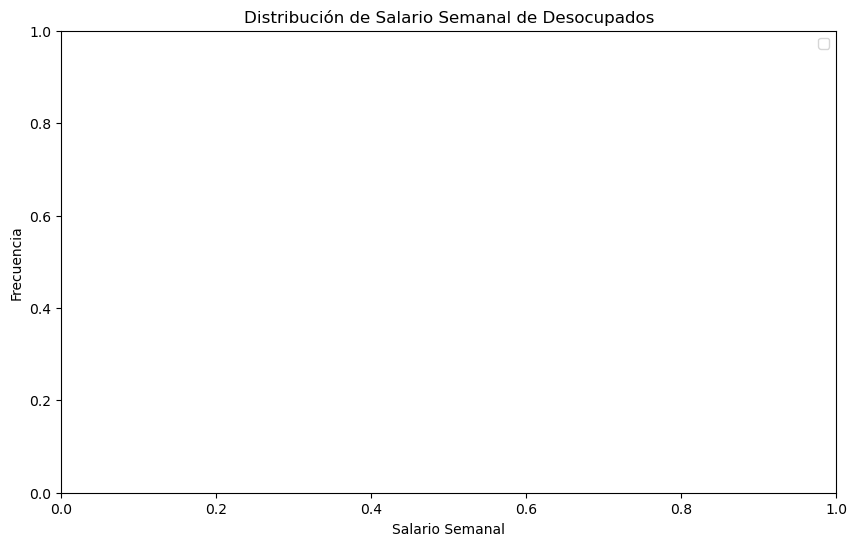

In [91]:
# Filtrar desocupados con salario mayor a 0
desocupados_salario = df_mdp[(df_mdp['ESTADO'] == 'Desocupado') & (df_mdp['salario_semanal'] > 0)]['salario_semanal']

# Histograma y densidad
plt.figure(figsize=(10, 6))
sns.histplot(desocupados_salario, kde=True, color='red', label='Desocupados')
plt.title('Distribución de Salario Semanal de Desocupados')
plt.xlabel('Salario Semanal')
plt.ylabel('Frecuencia')
plt.legend()  # Ahora sí encontrará la etiqueta
plt.show()

Cantidad de ocupados: 297
Cantidad de desocupados: 0


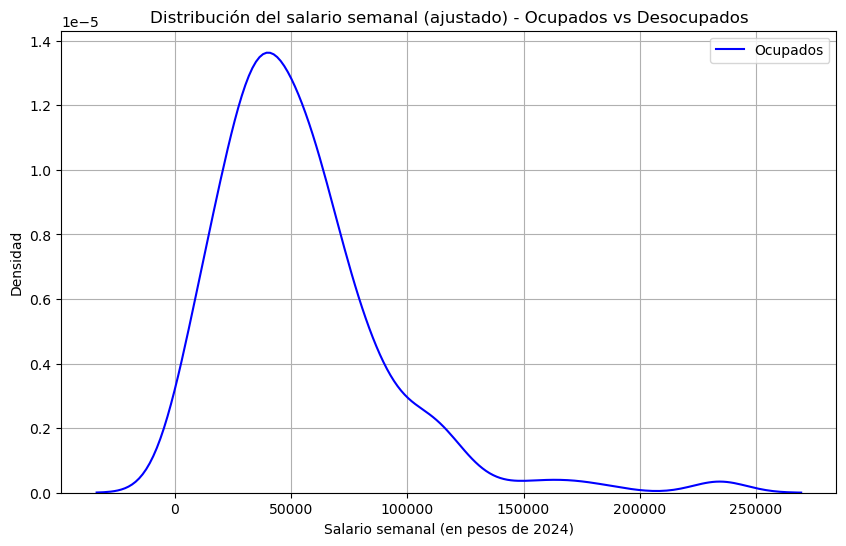

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar salarios semanales válidos
ocupados_salario = df_mdp[(df_mdp['ESTADO'] == 1) & (df_mdp['salario_semanal'] > 0)]['salario_semanal']
desocupados_salario = df_mdp[(df_mdp['ESTADO'] == 2) & (df_mdp['salario_semanal'] > 0)]['salario_semanal']

print("Cantidad de ocupados:", len(ocupados_salario))
print("Cantidad de desocupados:", len(desocupados_salario))

plt.figure(figsize=(10, 6))

# Graficar solo si hay datos válidos
if not ocupados_salario.empty:
    sns.kdeplot(ocupados_salario, label='Ocupados', color='blue')
if not desocupados_salario.empty:
    sns.kdeplot(desocupados_salario, label='Desocupados', color='red')

plt.title('Distribución del salario semanal (ajustado) - Ocupados vs Desocupados')
plt.xlabel('Salario semanal (en pesos de 2024)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

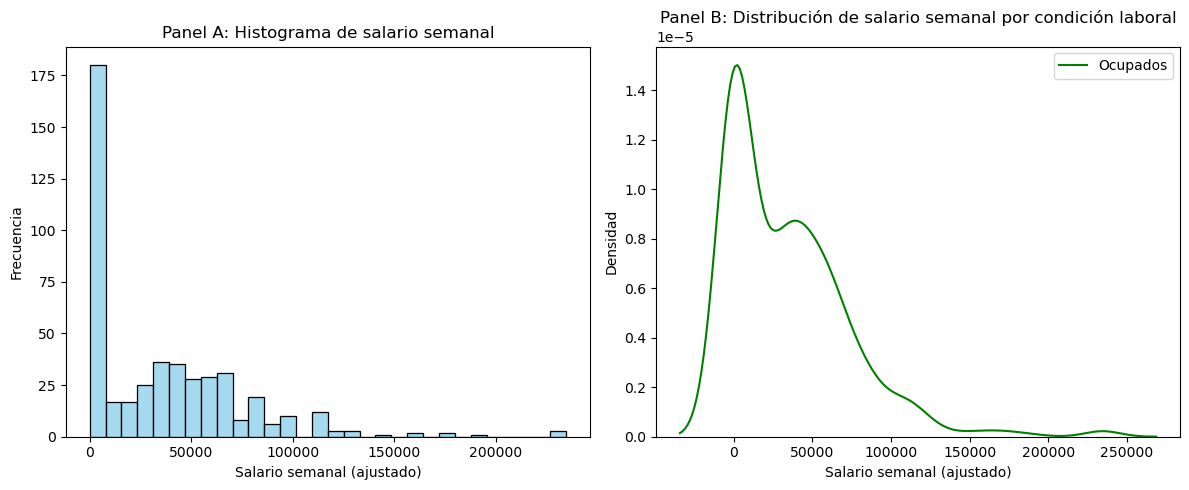

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurate de tener la variable 'salario_semanal' ya calculada
# Si no, podés calcularla así (suponiendo que 'P47T' es el ingreso mensual y 0.16 es el coeficiente de ajuste):
# df_mdp['salario_semanal'] = (df_mdp['P47T'] / 4) * 0.16

# Creamos una columna que identifique la condición
df_mdp['condicion'] = df_mdp['ESTADO'].map({1: 'Ocupado', 2: 'Desocupado'})

# PANEL A: Histograma general
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_mdp['salario_semanal'].dropna(), bins=30, kde=False, color='skyblue')
plt.title('Panel A: Histograma de salario semanal')
plt.xlabel('Salario semanal (ajustado)')
plt.ylabel('Frecuencia')

# PANEL B: KDE por condición
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_mdp[df_mdp['condicion'] == 'Ocupado']['salario_semanal'].dropna(), label='Ocupados', color='green')
sns.kdeplot(data=df_mdp[df_mdp['condicion'] == 'Desocupado']['salario_semanal'].dropna(), label='Desocupados', color='red')
plt.title('Panel B: Distribución de salario semanal por condición laboral')
plt.xlabel('Salario semanal (ajustado)')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

In [103]:
# Filtrar por personas ocupadas
ocupados = df_mdp[df_mdp['ESTADO'] == 1]

# Calcular horastrab para ocupados
ocupados.loc[:, 'horastrab'] = ocupados['PP3E_TOT'].fillna(0) + ocupados['PP3F_TOT'].fillna(0)

# Estadísticas descriptivas
estadisticas_ocupados = ocupados['horastrab'].describe(percentiles=[0.5])
print(estadisticas_ocupados)

count    478.000000
mean      38.895397
std       17.271101
min        0.000000
50%       40.000000
max      105.000000
Name: horastrab, dtype: float64
